# Feed-forward networks

In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn  # PyTorch's neural network module
import torch.optim as optim  # PyTorch's optimization module
import tqdm  # Progress bar lib

# ML utilities
from sklearn.model_selection import train_test_split  
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_swiss_roll
from sklearn.utils import shuffle

%matplotlib inline

SEED = 777

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

In [2]:
# Read data
data = fetch_california_housing()
X, y = data.data, data.target
display(fetch_california_housing(as_frame=True).frame.head())


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [4]:
# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)

X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [5]:
type(X_train)

numpy.ndarray

In [6]:
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [7]:
X_train.size(), y_train.size()

(torch.Size([14447, 8]), torch.Size([14447, 1]))

In [8]:
X_test.size(), y_test.size()

(torch.Size([6193, 8]), torch.Size([6193, 1]))

In [9]:
nn.ReLU??

Init signature: nn.ReLU(inplace: bool = False)
Source:        
class ReLU(Module):
    r"""Applies the rectified linear unit function element-wise:

    :math:`\text{ReLU}(x) = (x)^+ = \max(0, x)`

    Args:
        inplace: can optionally do the operation in-place. Default: ``False``

    Shape:
        - Input: :math:`(*)`, where :math:`*` means any number of dimensions.
        - Output: :math:`(*)`, same shape as the input.

    .. image:: ../scripts/activation_images/ReLU.png

    Examples::

        >>> m = nn.ReLU()
        >>> input = torch.randn(2)
        >>> output = m(input)


      An implementation of CReLU - https://arxiv.org/abs/1603.05201

        >>> m = nn.ReLU()
        >>> input = torch.randn(2).unsqueeze(0)
        >>> output = torch.cat((m(input), m(-input)))
    """
    __constants__ = ['inplace']
    inplace: bool

    def __init__(self, inplace: bool = False):
        super().__init__()
        self.inplace = inplace

    def forward(self, input: Tensor) -> Te

In [15]:
# Define the model
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)


#  4-layer feed-forward neural network
#
#  Input(8) → [24 → 12 → 6] → Output(1)

In [16]:
type(model).mro()

[torch.nn.modules.container.Sequential, torch.nn.modules.module.Module, object]

In [17]:
model

Sequential(
  (0): Linear(in_features=8, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=6, bias=True)
  (5): ReLU()
  (6): Linear(in_features=6, out_features=1, bias=True)
)

In [18]:
nn.Sequential(
    model,
    nn.Linear(1, 8),
    model,
)

Sequential(
  (0): Sequential(
    (0): Linear(in_features=8, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=6, bias=True)
    (5): ReLU()
    (6): Linear(in_features=6, out_features=1, bias=True)
  )
  (1): Linear(in_features=1, out_features=8, bias=True)
  (2): Sequential(
    (0): Linear(in_features=8, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=12, bias=True)
    (3): ReLU()
    (4): Linear(in_features=12, out_features=6, bias=True)
    (5): ReLU()
    (6): Linear(in_features=6, out_features=1, bias=True)
  )
)

In [19]:
type(model).mro()

[torch.nn.modules.container.Sequential, torch.nn.modules.module.Module, object]

In [20]:
nn.MSELoss.mro()

[torch.nn.modules.loss.MSELoss,
 torch.nn.modules.loss._Loss,
 torch.nn.modules.module.Module,
 object]

In [21]:
def gen():
  for i in range(10):
    yield i

In [22]:
g = gen()

In [23]:
next(g)

0

In [24]:
for i in (i for i in range(10)):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [25]:
next(model.parameters())

Parameter containing:
tensor([[-0.1275,  0.1976, -0.2677, -0.1017, -0.3491, -0.0048,  0.1361,  0.0055],
        [-0.2539, -0.3085, -0.2753, -0.3136,  0.2611, -0.1647,  0.0843,  0.2728],
        [-0.2009, -0.0219, -0.0189, -0.0456,  0.2275,  0.1499,  0.2115, -0.1993],
        [-0.3475,  0.1437,  0.0457,  0.1119,  0.0621, -0.2005, -0.2682,  0.3186],
        [ 0.0984, -0.2299,  0.1366, -0.1600,  0.2900,  0.2050, -0.0092, -0.1555],
        [ 0.2792, -0.1965,  0.2403,  0.2677, -0.1745, -0.0187,  0.2961, -0.1549],
        [-0.1118,  0.1744, -0.1176,  0.0198, -0.2179,  0.0423, -0.3391, -0.2837],
        [ 0.1317, -0.3449,  0.2229, -0.1922, -0.3252, -0.1076, -0.1579,  0.3249],
        [ 0.0481,  0.1109,  0.2330, -0.2208,  0.1809, -0.0008, -0.1780, -0.1518],
        [-0.3363, -0.2724, -0.0534,  0.3020, -0.1148,  0.1242, -0.1583,  0.0515],
        [ 0.2941,  0.2233,  0.0330, -0.1037, -0.0308,  0.0006,  0.0870, -0.3483],
        [ 0.2958,  0.1845,  0.1244,  0.0727,  0.3389,  0.2043, -0.2355,  0.0

In [26]:
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 20   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

## Autograd


$$Q=3a^3-b^2$$

$$\frac{\partial{Q}}{da}=9a^2$$

$$\frac{\partial{Q}}{db}=-2b$$

$$\Delta=[9a^2, -2b]$$

In [27]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [28]:
Q = 3*a**3 - b**2

In [29]:
Q.size(), Q

(torch.Size([2]), tensor([-12.,  65.], grad_fn=<SubBackward0>))

In [ ]:
# Q.backward()

In [30]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [31]:
a.grad, b.grad

(tensor([36., 81.]), tensor([-12.,  -8.]))

In [32]:
9*a**2

tensor([36., 81.], grad_fn=<MulBackward0>)

## Train loop

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [34]:
model = model.to(device)

In [35]:
next(model.parameters()).device

device(type='cpu')

In [36]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=2, disable=False) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size].to(device)
            y_batch = y_train[start:start+batch_size].to(device)

            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # print progress
            bar.set_postfix(mse=float(loss))

    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test.to(device))
    mse = loss_fn(y_pred.detach().cpu(), y_test.detach())
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

Epoch 0:   0%|          | 0/1445 [00:00<?, ?batch/s]

Epoch 19: 100%|██████████| 1445/1445 [00:10<00:00, 141.04batch/s, mse=0.216] 


In [ ]:
# model.state_dict()

MSE: 0.39
RMSE: 0.62


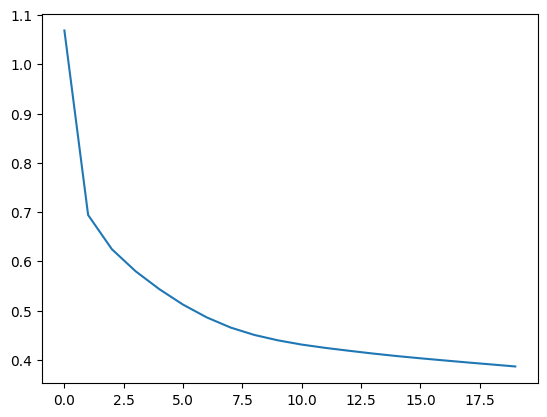

[   3.3292       31.            4.68220339    1.09957627 1047.
    2.21822034   33.94       -118.12      ] -> tensor([2.2710]) (expected [2.713])
[ 4.88390000e+00  1.60000000e+01  5.80248619e+00  1.08563536e+00
  1.66700000e+03  2.30248619e+00  3.53400000e+01 -1.19070000e+02] -> tensor([2.3712]) (expected [1.341])
[ 4.33700000e+00  3.70000000e+01  4.03532009e+00  1.01545254e+00
  1.07500000e+03  2.37306843e+00  3.39900000e+01 -1.18460000e+02] -> tensor([3.1166]) (expected [3.606])
[ 1.85710000e+00  4.00000000e+01  2.80804954e+00  1.08049536e+00
  1.42600000e+03  4.41486068e+00  3.40500000e+01 -1.18290000e+02] -> tensor([1.5378]) (expected [1.438])
[ 3.19440000e+00  5.00000000e+01  4.99751244e+00  1.04228856e+00
  1.13000000e+03  2.81094527e+00  3.40500000e+01 -1.18340000e+02] -> tensor([2.2506]) (expected [2.135])


In [38]:
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

model.eval()
# with torch.no_grad():
with torch.inference_mode():
    # Test out inference with 5 samples
    for i in range(5):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample.to(device))
        print(f"{X_test_raw[i]} -> {y_pred[0].detach().cpu()} (expected {y_test[i].numpy()})")



In [39]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder

# Read data
data = pd.read_csv("sonar.csv", header=None)
X = data.iloc[:, 0:60]
y = data.iloc[:, 60]

FileNotFoundError: [Errno 2] No such file or directory: 'sonar.csv'

In [ ]:
# Binary encoding of labels
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# Convert to 2D PyTorch tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [ ]:
# Define two models
class Wide(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(60, 180)
        self.relu = nn.ReLU()
        self.output = nn.Linear(180, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

class Deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(60, 60)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(60, 60)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(60, 60)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(60, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

# Compare model sizes
model1 = Wide()
model2 = Deep()
print(sum([x.reshape(-1).shape[0] for x in model1.parameters()]))  # 11161
print(sum([x.reshape(-1).shape[0] for x in model2.parameters()]))  # 11041

In [ ]:
# Helper function to train one model
def model_train(model, X_train, y_train, X_val, y_val):
    # loss function and optimizer
    loss_fn = nn.BCELoss()  # binary cross entropy
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    n_epochs = 300   # number of epochs to run
    batch_size = 10  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)

    # Hold the best model
    best_acc = - np.inf   # init to negative infinity
    best_weights = None

    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
                )
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())
    # restore model and return best accuracy
    model.load_state_dict(best_weights)
    return best_acc


In [ ]:
# train-test split: Hold out the test set for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# define 5-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
cv_scores_wide = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    model = Wide()
    acc = model_train(model, X_train[train], y_train[train], X_train[test], y_train[test])
    print("Accuracy (wide): %.2f" % acc)
    cv_scores_wide.append(acc)

In [ ]:
cv_scores_deep = []
for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    model = Deep()
    acc = model_train(model, X_train[train], y_train[train], X_train[test], y_train[test])
    print("Accuracy (deep): %.2f" % acc)
    cv_scores_deep.append(acc)

In [ ]:
# evaluate the model
wide_acc = np.mean(cv_scores_wide)
wide_std = np.std(cv_scores_wide)
deep_acc = np.mean(cv_scores_deep)
deep_std = np.std(cv_scores_deep)
print("Wide: %.2f%% (+/- %.2f%%)" % (wide_acc*100, wide_std*100))
print("Deep: %.2f%% (+/- %.2f%%)" % (deep_acc*100, deep_std*100))

In [ ]:
if wide_acc > deep_acc:
    print("Retrain a wide model")
    model = Wide()
else:
    print("Retrain a deep model")
    model = Deep()
acc = model_train(model, X_train, y_train, X_test, y_test)
print(f"Final model accuracy: {acc*100:.2f}%")

In [ ]:
model.eval()
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(5):
        y_pred = model(X_test[i:i+1])
        print(f"{X_test[i].numpy()} -> {y_pred[0].numpy()} (expected {y_test[i].numpy()})")

    # Plot the ROC curve
    y_pred = model(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr) # ROC curve = TPR vs FPR
    plt.title("Receiver Operating Characteristics")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()